In [1]:
import numpy as np
from tensorflow import keras
from keras.layers import Input, Dense
from keras import Model
from keras.datasets import mnist
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [65]:
# preprocessing input data
(x_train , y_train), (x_test, y_test) = mnist.load_data()

In [66]:
# x_train = x_train.astype('float32')/255
# x_test = x_test.astype('float32')/255
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
# x_test =  x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [67]:
print("shape x_train : ", x_train.shape)
print("shape x_test : ", x_test.shape)

shape x_train :  (60000, 28, 28, 1)
shape x_test :  (10000, 28, 28, 1)


In [72]:
# defining the model
encoded_size = 32

autoencoder = keras.models.Sequential()
autoencoder.add(keras.layers.Input(shape = (28,28,1)))
autoencoder.add(keras.layers.Conv2D(32, (3,3), activation = 'relu',padding = 'same'))
autoencoder.add(keras.layers.MaxPooling2D((2,2),padding = 'same'))
autoencoder.add(keras.layers.Conv2D(32, (3,3), activation = 'relu',padding = 'same'))
autoencoder.add(keras.layers.MaxPooling2D((2,2),padding = 'same'))
autoencoder.add(keras.layers.UpSampling2D((2,2)))
autoencoder.add(keras.layers.Conv2D(32, (3,3), activation = 'relu',padding = 'same'))
autoencoder.add(keras.layers.UpSampling2D((2,2)))
autoencoder.add(keras.layers.Conv2D(1, (3,3), activation = 'relu',padding = 'same'))

# autoencoder.add(keras.layers.Dense(784, activation = "sigmoid"))

# encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# # this is our input placeholder
# input_img = keras.layers.Input(shape=(784,))
# # "encoded" is the encoded representation of the input
# encoded = keras.layers.Dense(encoding_dim, activation='relu')(input_img)
# # "decoded" is the lossy reconstruction of the input
# decoded = keras.layers.Dense(784, activation='sigmoid')(encoded)

# # this model maps an input to its reconstruction
# autoencoder = keras.Model(input_img, decoded)

In [73]:
autoencoder.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
up_sampling2d_14 (UpSampling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
up_sampling2d_15 (UpSampling (None, 28, 28, 32)      

In [74]:
autoencoder.compile(loss = 'mean_squared_error', optimizer = 'adam' )

In [75]:
autoencoder.fit(x_train, x_train, epochs = 5, shuffle = True, validation_data = (x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 23s 378us/sample - loss: 319.5438 - val_loss: 180.7956
Epoch 2/5
60000/60000 [==============================] - 22s 371us/sample - loss: 164.5056 - val_loss: 146.7653
Epoch 3/5
60000/60000 [==============================] - 22s 368us/sample - loss: 134.6170 - val_loss: 126.0499
Epoch 4/5
60000/60000 [==============================] - 21s 346us/sample - loss: 118.4502 - val_loss: 109.5072
Epoch 5/5
60000/60000 [==============================] - 22s 370us/sample - loss: 108.1753 - val_loss: 101.1400


In [76]:
decoded_images = autoencoder.predict(x_test)
# decoded_images[0] = decoded_images[0]*255
# plt.imshow(decoded_images[0].reshape(28,28))
# print(decoded_images[0])
# print(x_test[0])

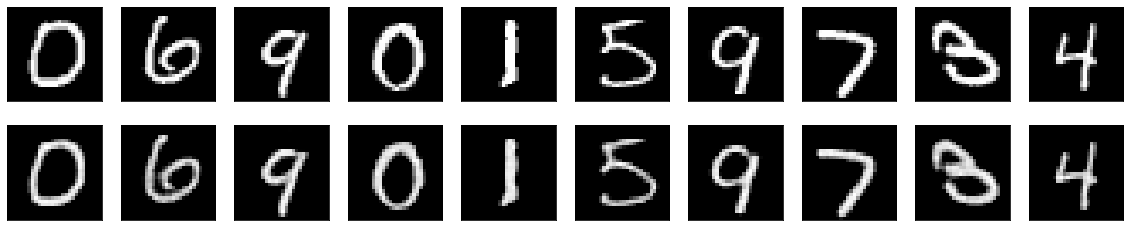

In [77]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i+10].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images[i+10].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()